In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

# IMPORT DEL DATASET

In [2]:
path1 = "enron.txt"

# creiamo un dataframe dove le prime 2 colonne rappresentano i nodi coinvolti nella relazione mentre la terza colonna 
#rappresenta il tipo di arco

df = pd.read_csv(path1, sep=" ", names = ["node1", "node2", "type"])

df.head()

,node1,node2,type
0,343111,343112,1
1,343113,343114,1
2,343114,343112,1
3,343115,343116,1
4,343117,343112,1


- First column: person id
- Second column: person id
- Third column: relationship 
    - 1 means manager-subordinate relationships, 
    - 0 means colleague

# PRE-PROCESSING

In [3]:
# estraiamo i nodi
tmp = df.node1
tmp = tmp.append(df.node2)
nodi = tmp.unique().tolist()

# red contiene tutti i record che hanno "collega" come tipo di relazione
red = df[df["type"]== 0]
# blue contiene tutti i record che hanno "manager-subordinato" come tipo di relazione
blue = df[df["type"]== 1]

#togliamo la colonna type dai 2 nuovi ddtaframe
red = red.drop(["type"], axis=1) 
blue = blue.drop(["type"], axis=1)

#li trasformiamo da dataframe a nparray
red= np.array(red)
blue= np.array(blue)

number of nodes: 151
number of edges: 256


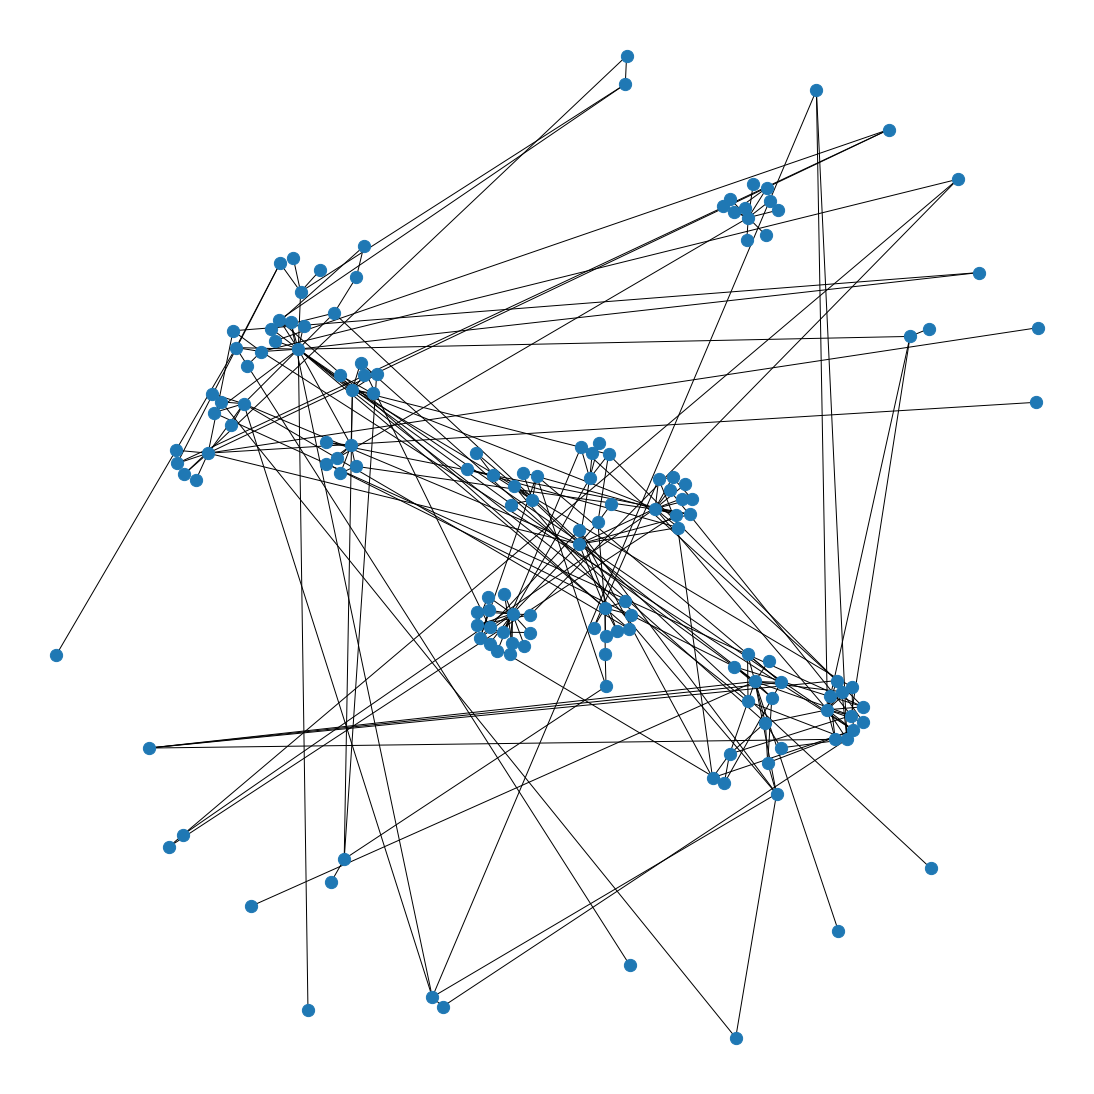

In [4]:
# creiamo il grafo indiretto
G = nx.Graph()

# aggiungiamo i nodi al grafo
G.add_nodes_from(nodi)

# aggiungiamo gli archi al grafo
for index,row in df.iloc[:].iterrows():
    G.add_edge(row["node1"], row["node2"], weight = row["type"])

# plot del grafo
pos = nx.spring_layout(G)
plt.figure(figsize = (15,15))
nx.draw(G, pos, with_labels = False, node_size = 150)


print("number of nodes: "+ str(G.number_of_nodes())) #numero nodi
print("number of edges: "+ str(G.number_of_edges())) #numero archi

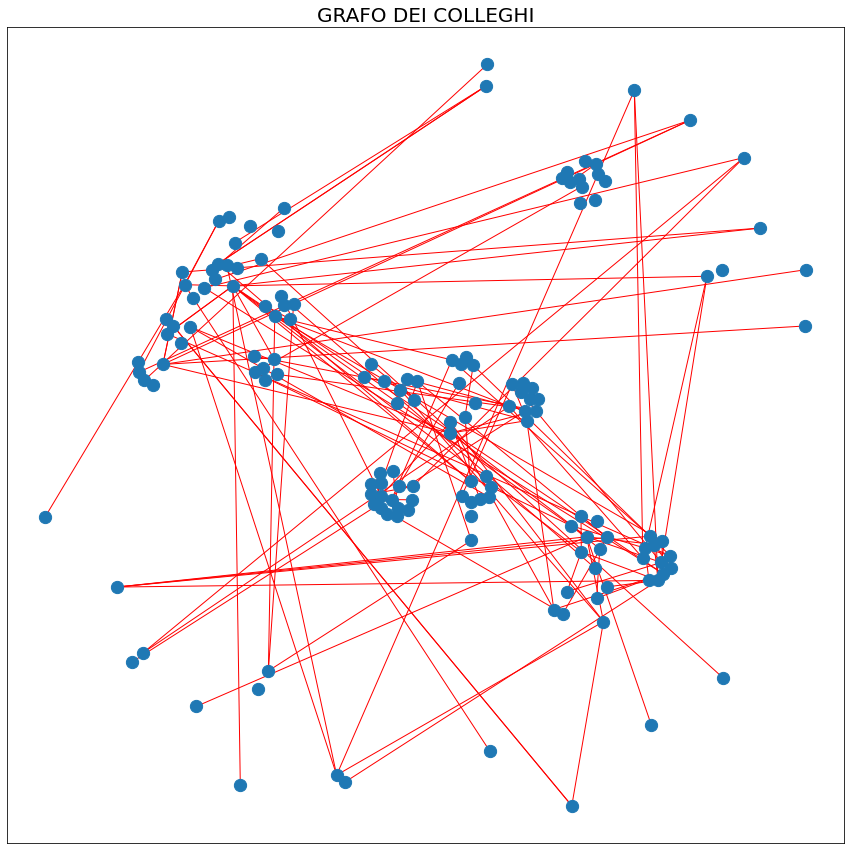

In [5]:
plt.figure(figsize = (15,15))
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 150)
nx.draw_networkx_edges(G, pos, edgelist=red, edge_color='r', arrows=True)
plt.title("GRAFO DEI COLLEGHI", fontsize=20)
plt.show()

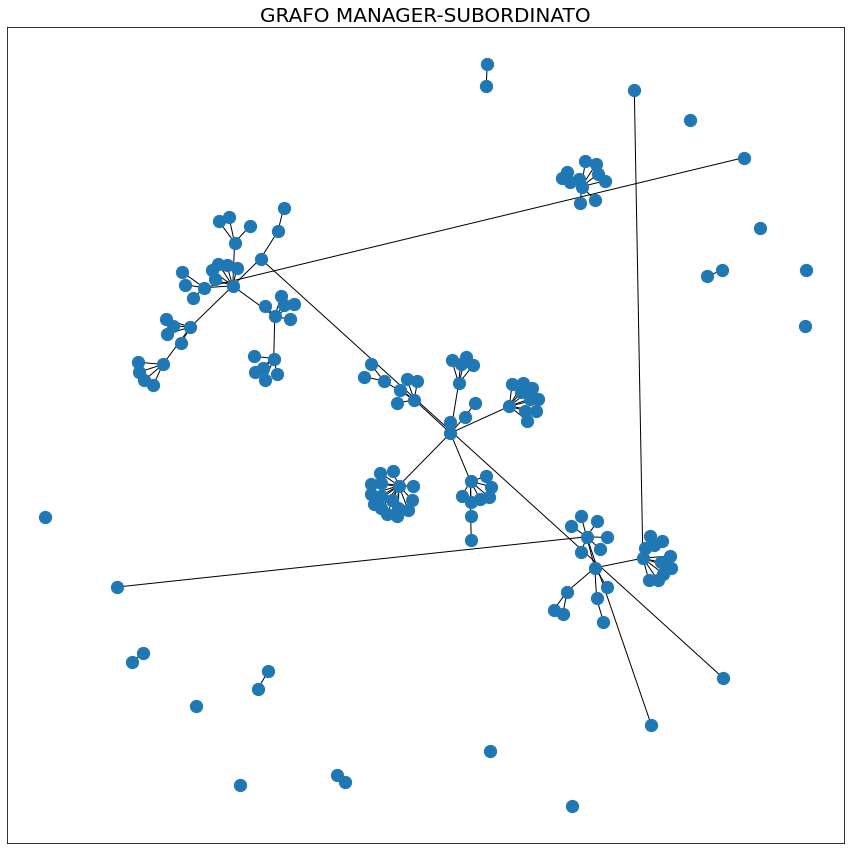

In [6]:
plt.figure(figsize = (15,15))

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 150)
nx.draw_networkx_edges(G, pos, edgelist=blue, arrows=False)
plt.title("GRAFO MANAGER-SUBORDINATO", fontsize=20)
plt.show()

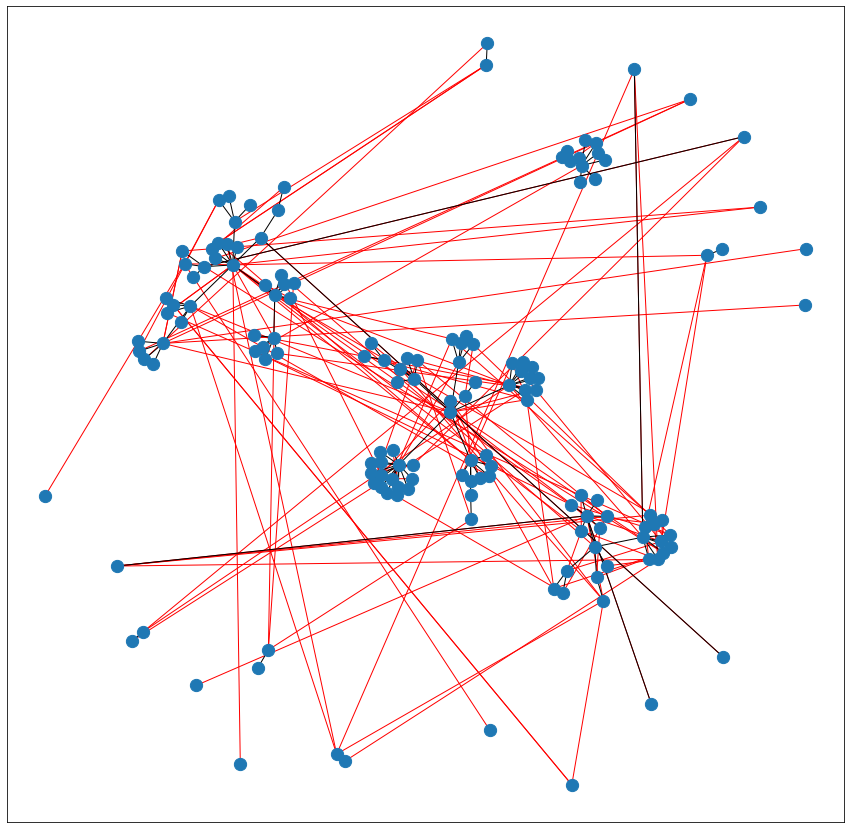

In [7]:
plt.figure(figsize = (15,15))

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 150)
nx.draw_networkx_edges(G, pos, edgelist=red, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=blue, arrows=False)

plt.show()

# GRADI DEI NODI E CLUSTERING

**Degree**: per ogni nodo definiamo degree il numero di connessioni relative a quel nodo.

In [8]:
print(G.degree())

[(343111, 13), (343113, 1), (343114, 17), (343115, 1), (343117, 6), (343118, 6), (343119, 20), (343120, 2), (343121, 7), (343122, 3), (343123, 4), (343124, 14), (343125, 1), (343126, 5), (343127, 2), (343128, 10), (343129, 9), (343132, 2), (343133, 2), (343134, 1), (343136, 2), (343138, 2), (343139, 1), (343140, 7), (343141, 4), (343143, 1), (343144, 4), (343145, 3), (343146, 2), (343147, 2), (343148, 11), (343149, 1), (343150, 1), (343151, 3), (343152, 5), (343153, 1), (343154, 3), (343155, 2), (343156, 1), (343158, 2), (343160, 2), (343161, 2), (343162, 2), (343163, 2), (343164, 4), (343165, 5), (343166, 2), (343167, 3), (343168, 4), (343170, 3), (343171, 1), (343172, 3), (343174, 3), (343175, 2), (343176, 5), (343177, 15), (343178, 1), (343179, 2), (343180, 3), (343181, 3), (343182, 2), (343183, 8), (343185, 2), (343186, 1), (343187, 1), (343189, 5), (343190, 1), (343191, 1), (343193, 4), (343194, 1), (343196, 2), (343197, 3), (343198, 4), (343199, 1), (343200, 1), (343201, 2), (343

In [9]:
# stampiamo tutti i gradi dei nodi per avere una visione ordinata
sorted(d for n,d in G.degree())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 9,
 10,
 11,
 11,
 11,
 12,
 13,
 14,
 15,
 17,
 20]

**Clustering coefficient**: cioè quante volte un nodo chiude un grafo di 3 nodi.

In [10]:
nx.clustering(G)

{343111: 0.0641025641025641,
 343113: 0,
 343114: 0.058823529411764705,
 343115: 0,
 343117: 0.06666666666666667,
 343118: 0.13333333333333333,
 343119: 0.03684210526315789,
 343120: 0,
 343121: 0.09523809523809523,
 343122: 0.3333333333333333,
 343123: 0.3333333333333333,
 343124: 0.08791208791208792,
 343125: 0,
 343126: 0,
 343127: 1.0,
 343128: 0.044444444444444446,
 343129: 0.05555555555555555,
 343132: 0,
 343133: 0,
 343134: 0,
 343136: 0,
 343138: 1.0,
 343139: 0,
 343140: 0.047619047619047616,
 343141: 0.16666666666666666,
 343143: 0,
 343144: 0.16666666666666666,
 343145: 0,
 343146: 1.0,
 343147: 0,
 343148: 0.03636363636363636,
 343149: 0,
 343150: 0,
 343151: 0,
 343152: 0,
 343153: 0,
 343154: 0.3333333333333333,
 343155: 1.0,
 343156: 0,
 343158: 0,
 343160: 0,
 343161: 0,
 343162: 0,
 343163: 0,
 343164: 0,
 343165: 0.2,
 343166: 1.0,
 343167: 0.3333333333333333,
 343168: 0,
 343170: 0.3333333333333333,
 343171: 0,
 343172: 0,
 343174: 0,
 343175: 1.0,
 343176: 0.2,
 34

In [11]:
#mostra il clustering medio di ogni grafo, che è la media del clustering coefficient per ogni nodo
print(nx.average_clustering(G))

0.19014403675999228


**Densità**: indica il numero degli archi presenti rispetto al numero possibile di archi. Dato un grafo indiretto di n nodi, il massimo numero di archi che può avere è n*(n-1)/2

In [12]:
nx.density(G)

0.02260485651214128

**Clique**: insieme di nodi totalmente connessi tra di loro.

In [13]:
import networkx
from networkx.algorithms.approximation import clique

print(clique.max_clique(G))
list(nx.find_cliques(G))

{343248, 343177, 343176}


[[343111, 343233, 343254],
 [343111, 343233, 343247],
 [343111, 343239, 343112],
 [343111, 343239, 343247],
 [343111, 343112, 343198],
 [343111, 343164],
 [343111, 343186],
 [343111, 343156],
 [343111, 343124],
 [343111, 343159],
 [343111, 343130],
 [343111, 343196],
 [343112, 343203, 343148],
 [343112, 343140],
 [343112, 343177],
 [343112, 343114, 343117],
 [343112, 343128, 343129],
 [343112, 343260],
 [343113, 343114],
 [343114, 343234],
 [343114, 343138, 343127],
 [343114, 343211, 343165],
 [343114, 343182, 343165],
 [343114, 343190],
 [343114, 343223],
 [343114, 343225, 343210],
 [343114, 343259, 343185],
 [343114, 343259, 343210],
 [343114, 343259, 343167],
 [343114, 343256],
 [343115, 343116],
 [343116, 343200],
 [343116, 343175, 343213],
 [343116, 343241],
 [343116, 343178],
 [343116, 343212],
 [343116, 343149],
 [343116, 343244, 343229],
 [343116, 343246],
 [343117, 343208],
 [343117, 343266],
 [343117, 343172],
 [343117, 343205],
 [343119, 343176, 343177],
 [343119, 343131],
 

#### CONNETTIVITA'

**nx.is_connected(G)** ci permette di verificare se il grafo è connesso (quindi se a partire da un nodo posso raggiungere qualsiasi altro nodo) o se è diviso in più parti.

In [14]:
nx.is_connected(G)

True

**number_connected_components()** ci restituisce il numero delle componenti connesse all'interno del grafo.

In [15]:
nx.number_connected_components(G)

1

**node_connectivity()**: ci permette di capire quanti nodi bisogna togliere per far diventare il grafo sconnesso

In [16]:
nx.node_connectivity(G)

1

**edge_connectivity()** ci permette di capire quanti archi bisogna togliere per far diventare il grafo sconnesso.

In [17]:
nx.edge_connectivity(G)

1

**Eccentricità** dato un nodo, definiamo eccentricità di quel nodo la massima distanza geodesica tra quel nodo ed ogni altro nodo del grafo.

In [18]:
nx.eccentricity(G)

{343111: 5,
 343113: 8,
 343114: 7,
 343115: 8,
 343117: 6,
 343118: 5,
 343119: 4,
 343120: 5,
 343121: 5,
 343122: 5,
 343123: 7,
 343124: 6,
 343125: 6,
 343126: 5,
 343127: 8,
 343128: 6,
 343129: 5,
 343132: 5,
 343133: 5,
 343134: 5,
 343136: 7,
 343138: 8,
 343139: 8,
 343140: 7,
 343141: 5,
 343143: 6,
 343144: 5,
 343145: 7,
 343146: 5,
 343147: 6,
 343148: 5,
 343149: 8,
 343150: 6,
 343151: 7,
 343152: 6,
 343153: 6,
 343154: 5,
 343155: 5,
 343156: 6,
 343158: 7,
 343160: 6,
 343161: 6,
 343162: 7,
 343163: 6,
 343164: 6,
 343165: 7,
 343166: 5,
 343167: 7,
 343168: 6,
 343170: 5,
 343171: 7,
 343172: 7,
 343174: 6,
 343175: 8,
 343176: 5,
 343177: 5,
 343178: 8,
 343179: 8,
 343180: 8,
 343181: 7,
 343182: 8,
 343183: 6,
 343185: 8,
 343186: 6,
 343187: 6,
 343189: 6,
 343190: 8,
 343191: 6,
 343193: 6,
 343194: 6,
 343196: 6,
 343197: 7,
 343198: 5,
 343199: 6,
 343200: 8,
 343201: 6,
 343202: 7,
 343203: 6,
 343204: 6,
 343205: 7,
 343206: 6,
 343207: 7,
 343208: 7,
 343

**Diametro** massima eccentricità di tutti i suoi nodi.

In [19]:
nx.diameter(G)

8

**Raggio** è il valor minimo di eccentricità di un nodo.

In [20]:
nx.radius(G)

4

**Periferia** è l'insieme di nodi che hanno la loro eccentricità uguale al loro diametro.

In [21]:
nx.periphery(G)

[343113,
 343115,
 343127,
 343138,
 343139,
 343149,
 343175,
 343178,
 343179,
 343180,
 343182,
 343185,
 343190,
 343200,
 343210,
 343212,
 343213,
 343223,
 343225,
 343229,
 343234,
 343244,
 343246,
 343256,
 343259]

**Centro** insieme di nodi la cui eccentricità è uguale al raggio del grafo.

In [22]:
nx.center(G)

[343119, 343130]

In [23]:
# la funzione "draw" ci permette di rappresentare i grafi andando a variare il colore dei nodi in funzione 
# del valore di centralità assunto da quest’ultimo.

import matplotlib.colors as mcolors

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=150, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

**Degree Centrality** indica quanto un nodo è importante valutando quante connessioni ha a disposizione.

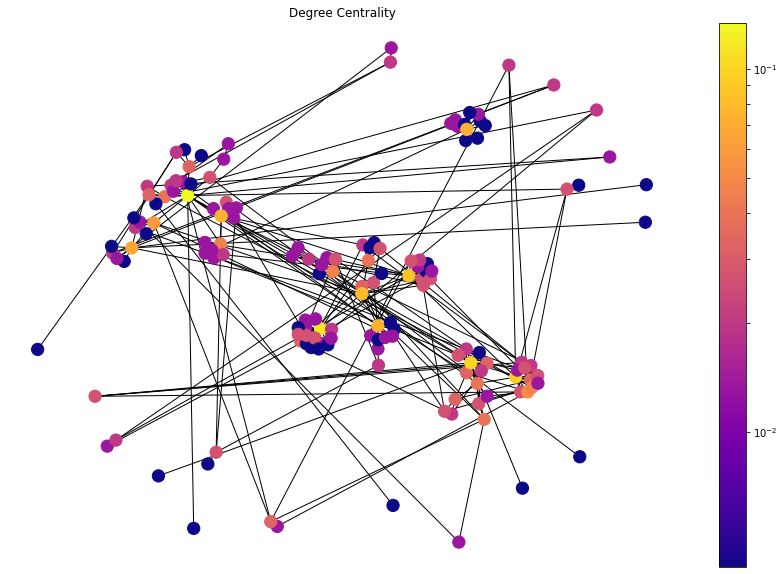

In [24]:
plt.figure(figsize = (15,10))
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

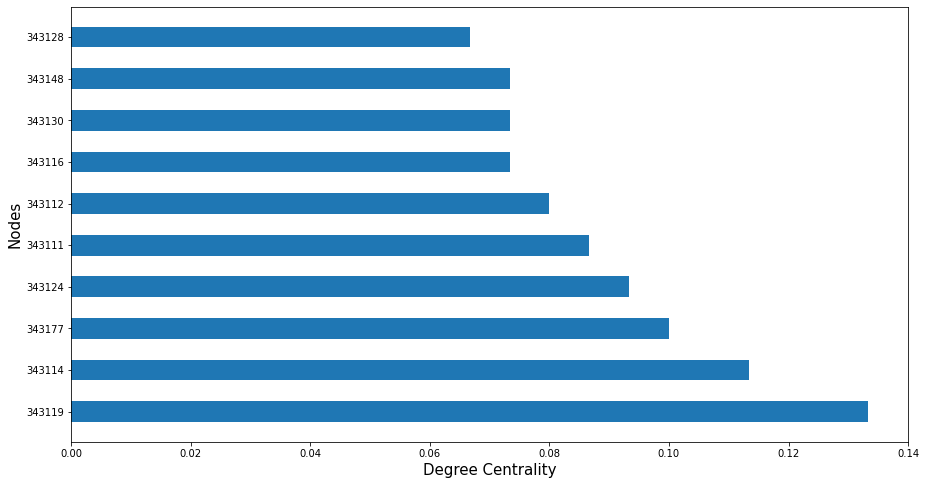

In [25]:
centrality = nx.degree_centrality(G)

newdf=pd.DataFrame({'nodi':centrality.keys(), 'valori':centrality.values()}).sort_values('valori', ascending=False)
newdf2=newdf[:10]
newdf2=newdf2.reset_index(drop=True)
newdf2.head()

def barchart(data, labels):
    pos = np.arange(len(data)) + 0.5  # the bar centers on the y axis
    plt.figure(figsize=(15,8))
    plt.barh(pos, data.sort_index(), align='center', height=0.5)
    plt.yticks(pos, labels.sort_index())
    

barchart(newdf2["valori"], newdf2["nodi"])
plt.xlabel("Degree Centrality", size=15)
plt.ylabel("Nodes", size=15)
plt.show()

**Closeness centrality** indica quanto un nodo è importante in base a quanto facilmente riesce ad arrivare dappertutto.

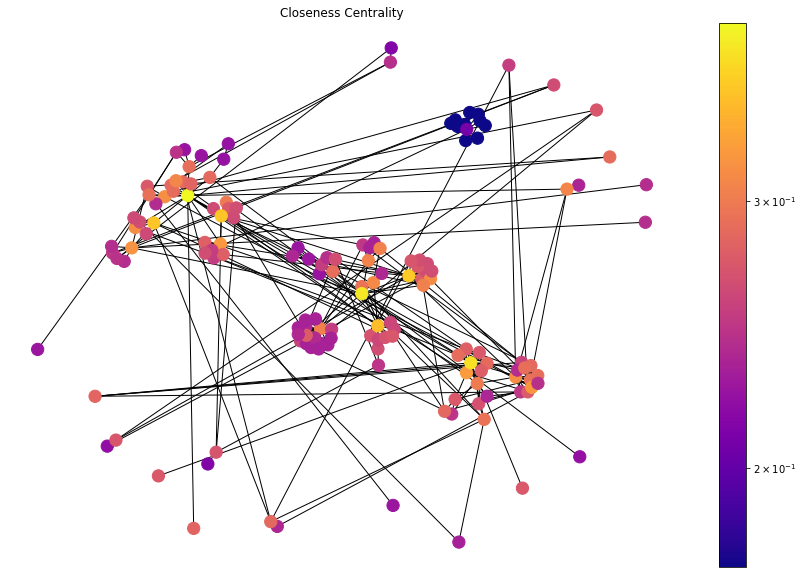

In [26]:
plt.figure(figsize = (15,10))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

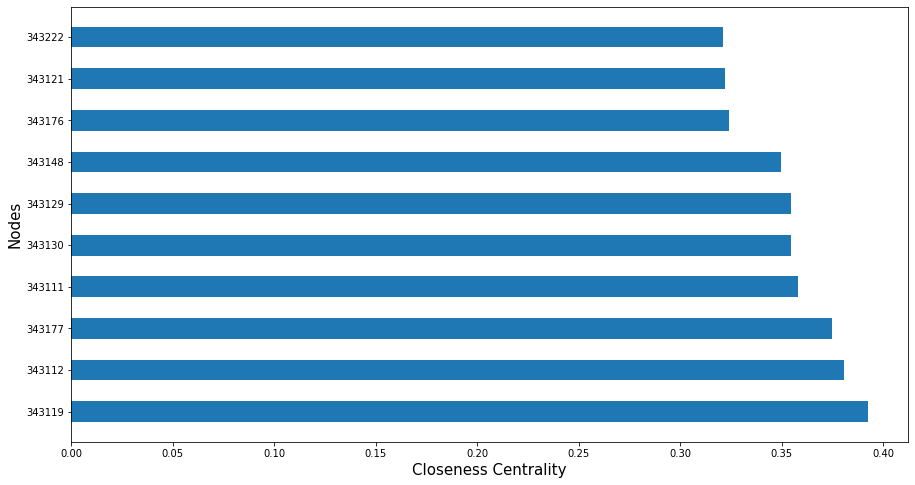

In [27]:
centrality = nx.closeness_centrality(G)

newdf=pd.DataFrame({'nodi':centrality.keys(), 'valori':centrality.values()}).sort_values('valori', ascending=False)
newdf2=newdf[:10]
newdf2=newdf2.reset_index(drop=True)
newdf2.head()

def barchart(data, labels):
    pos = np.arange(len(data)) + 0.5  # the bar centers on the y axis
    plt.figure(figsize=(15,8))
    plt.barh(pos, data.sort_index(), align='center', height=0.5)
    plt.yticks(pos, labels.sort_index())
    

barchart(newdf2["valori"], newdf2["nodi"])
plt.xlabel("Closeness Centrality", size=15)
plt.ylabel("Nodes", size=15)
plt.show()

**Betweennes Centrality** indica quanto un nodo è importante in base a quante volte compare in mezzo a degli shortest path (cioè quante volte devo passare da lui per arrivare da un'altra parte del grafo).

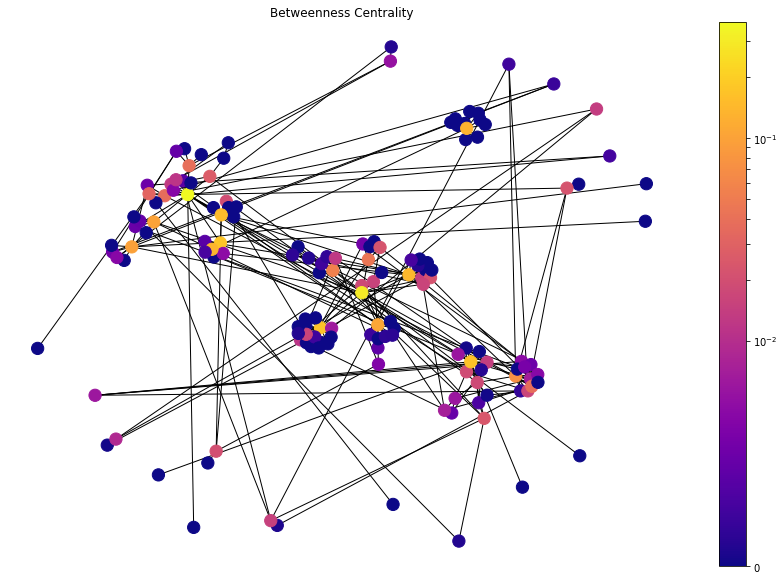

In [28]:
plt.figure(figsize = (15,10))
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

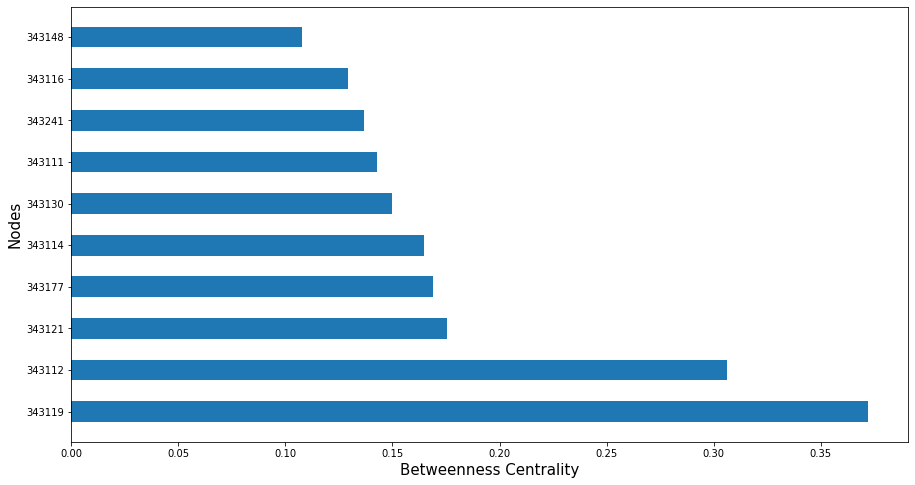

In [29]:
centrality = nx.betweenness_centrality(G)

newdf=pd.DataFrame({'nodi':centrality.keys(), 'valori':centrality.values()}).sort_values('valori', ascending=False)
newdf2=newdf[:10]
newdf2=newdf2.reset_index(drop=True)
newdf2.head()

def barchart(data, labels):
    pos = np.arange(len(data)) + 0.5  # the bar centers on the y axis
    plt.figure(figsize=(15,8))
    plt.barh(pos, data.sort_index(), align='center', height=0.5)
    plt.yticks(pos, labels.sort_index())
    

barchart(newdf2["valori"], newdf2["nodi"])
plt.xlabel("Betweenness Centrality", size=15)
plt.ylabel("Nodes", size=15)
plt.show()

**Eigenvector Centrality** indica quanto un nodo è importante in base a quanto sono centrali ciascuno dei suoi legami.

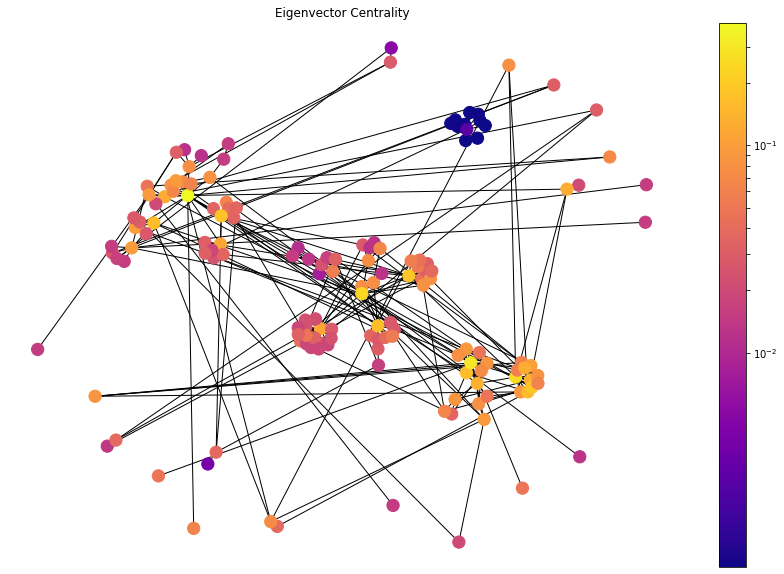

In [30]:
plt.figure(figsize = (15,10))
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

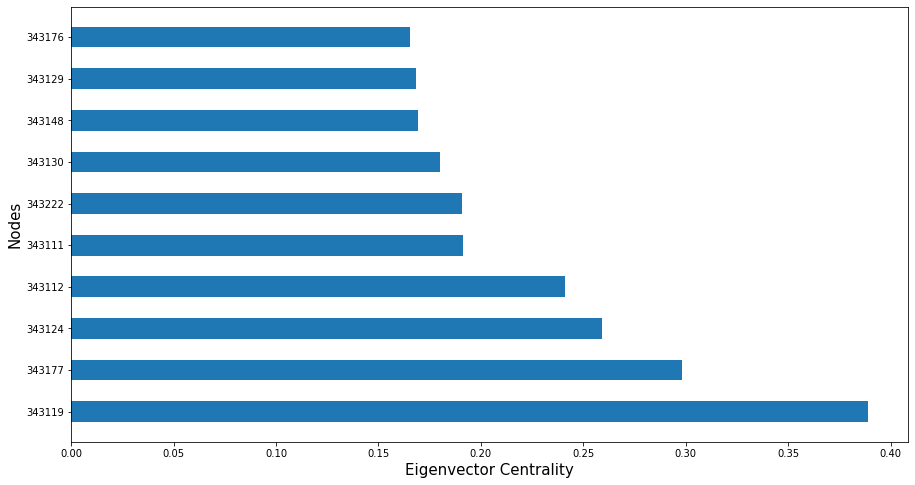

In [31]:
centrality = nx.eigenvector_centrality(G)

newdf=pd.DataFrame({'nodi':centrality.keys(), 'valori':centrality.values()}).sort_values('valori', ascending=False)
newdf2=newdf[:10]
newdf2=newdf2.reset_index(drop=True)
newdf2.head()

def barchart(data, labels):
    pos = np.arange(len(data)) + 0.5  # the bar centers on the y axis
    plt.figure(figsize=(15,8))
    plt.barh(pos, data.sort_index(), align='center', height=0.5)
    plt.yticks(pos, labels.sort_index())
    

barchart(newdf2["valori"], newdf2["nodi"])
plt.xlabel("Eigenvector Centrality", size=15)
plt.ylabel("Nodes", size=15)
plt.show()

# EGO NETWORK DEL NODO 343119

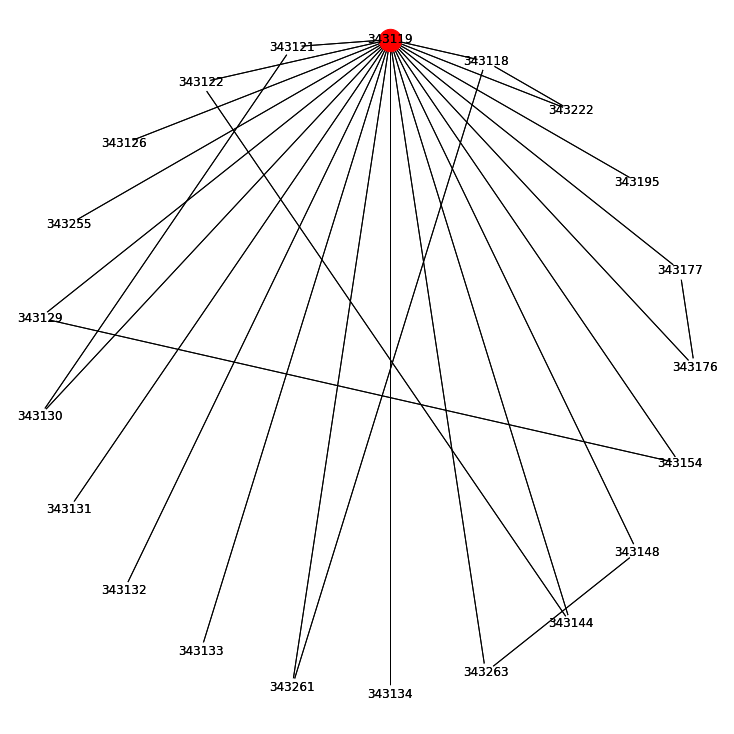

In [32]:
from operator import itemgetter

plt.figure(figsize = (10,10))

node_and_degree = G.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Crea l'ego network dal componente principale
hub_ego = nx.ego_graph(G, largest_hub)
# Plotta i nodi attorno al nodo ego
pos = nx.circular_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)
# Plotta il nodo ego più grande e rosso
nx.draw(hub_ego, pos, nodelist=[largest_hub], node_size=500, node_color='r', with_labels = True)

plt.show()

# CONCLUSIONI

Dopo aver analizzato tutti i tipi di centralità, possiamo concludere che sicuramente i nodi che per la nostra rete sono fondamentali sono:

- 343119 (di cui abbiamo fatto l'ego network)
- 343112
- 343177